In [12]:
import re
import tensorflow
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers
from keras.datasets import imdb
from keras import Sequential
from keras.layers import Embedding, Dense, SimpleRNN
from keras.preprocessing import sequence
import matplotlib.pyplot as plt

In [2]:
vocabulary_size = 5000 #la cantidad de palabras que va a manejar la red
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocabulary_size)
print('Loaded dataset with {} training samples, {} test samples'.format(len(X_train), len(X_test)))

Loaded dataset with 25000 training samples, 25000 test samples


In [3]:
print('---review---')
print(X_test[435]) #esto es el comentario 435, con todas sus palabras intercambiadas por su número del vocabulary size
print('---label---')
print(y_test[435])#0 negativa, 1 positiva

---review---
[1, 1028, 2, 10, 10, 121, 81, 13, 895, 19, 43, 89, 710, 14, 20, 16, 2, 2, 84, 581, 467, 4, 4056, 2, 2, 7, 6, 194, 2, 54, 13, 86, 1829, 180, 8, 106, 14, 20, 13, 16, 4960, 15, 4, 3238, 121, 24, 525, 21, 158, 2, 312, 2, 15, 610, 4887, 776, 8, 1968, 254, 5, 230, 13, 2937, 23, 149, 12, 88, 13, 40, 8, 67, 102, 143, 8, 4, 130, 60, 373, 663, 14, 20, 16, 394, 61, 980, 37, 435, 8, 1666, 1004, 4, 86, 747, 234, 972, 39, 1556, 12, 6, 52, 4088, 8, 1666, 197, 12, 16, 642, 15, 13, 69, 2627, 8, 106, 12, 32, 10, 10, 2409, 2, 60, 11, 1058, 1396, 4, 197, 9, 710, 13, 124, 26, 44, 17, 629, 5, 3541, 17, 1035, 2, 36, 64, 1319, 8, 1189, 31, 232, 56, 5, 516, 6, 1132, 159, 36, 71, 2654, 56, 4, 130, 13, 122, 760, 12, 2067, 208]
---label---
0


In [4]:
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print('---review with words---')
print([id2word.get(i, ' ') for i in X_train[6]])
print('---label---')
print(y_train[6])

---review with words---
['the', 'and', 'full', 'involving', 'to', 'impressive', 'boring', 'this', 'as', 'and', 'and', 'br', 'villain', 'and', 'and', 'need', 'has', 'of', 'costumes', 'b', 'message', 'to', 'may', 'of', 'props', 'this', 'and', 'and', 'concept', 'issue', 'and', 'to', "god's", 'he', 'is', 'and', 'unfolds', 'movie', 'women', 'like', "isn't", 'surely', "i'm", 'and', 'to', 'toward', 'in', "here's", 'for', 'from', 'did', 'having', 'because', 'very', 'quality', 'it', 'is', 'and', 'and', 'really', 'book', 'is', 'both', 'too', 'worked', 'carl', 'of', 'and', 'br', 'of', 'reviewer', 'closer', 'figure', 'really', 'there', 'will', 'and', 'things', 'is', 'far', 'this', 'make', 'mistakes', 'and', 'was', "couldn't", 'of', 'few', 'br', 'of', 'you', 'to', "don't", 'female', 'than', 'place', 'she', 'to', 'was', 'between', 'that', 'nothing', 'and', 'movies', 'get', 'are', 'and', 'br', 'yes', 'female', 'just', 'its', 'because', 'many', 'br', 'of', 'overly', 'to', 'descent', 'people', 'time', 

In [5]:
print('Maximum review length: {}'.format(
len(max((X_train + X_test), key=len))))

Maximum review length: 2697


In [6]:
print('Minimum review length: {}'.format(
len(min((X_test + X_test), key=len))))

Minimum review length: 14


In [7]:
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
#limitamos las resenas a tener como mucho 500 palabras
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [8]:
#se define la red neuronal, con una capa de embedding de dimension 64, la capa LSTM
#con salida de 100 dimensiones y una capa densa con una salidad de una dimension y
#funcion de activacion sigmoide.
embedding_size=12
model=Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(SimpleRNN(32, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 12)           60000     
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1440      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 61473 (240.13 KB)
Trainable params: 61473 (240.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [9]:
#ajustes de la red
model.compile(loss='binary_crossentropy',
optimizer='adam',
metrics=['accuracy'])

In [10]:
#ajustes del entrenamiento
batch_size = 512
num_epochs = 2
X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]
history = model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid),
batch_size=batch_size, epochs=num_epochs)

Epoch 1/2


2024-02-03 15:52:12.219676: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 48976000 exceeds 10% of free system memory.


48/48 [==============================] - 17s 295ms/step - loss: 0.6750 - accuracy: 0.5684 - val_loss: 0.5942 - val_accuracy: 0.6699
Epoch 2/2
48/48 [==============================] - 12s 244ms/step - loss: 0.4897 - accuracy: 0.7828 - val_loss: 0.4304 - val_accuracy: 0.8086


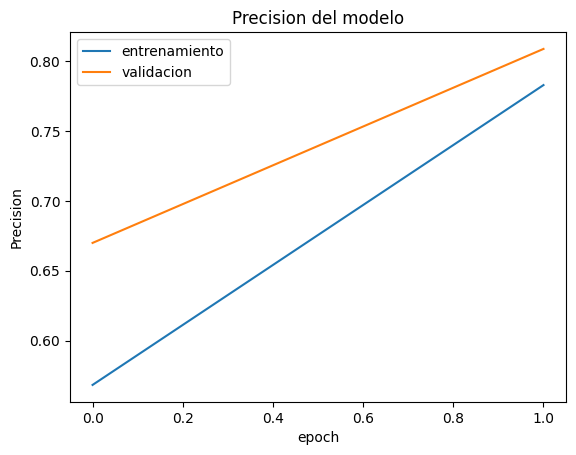

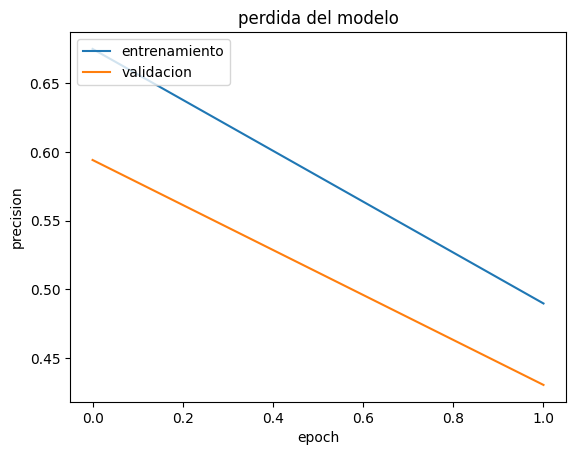

In [13]:
#Precision
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precision del modelo')
plt.ylabel('Precision')
plt.xlabel('epoch')
plt.legend(['entrenamiento', 'validacion'], loc='upper left')
plt.show()
#Perdida
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('perdida del modelo')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['entrenamiento', 'validacion'], loc='upper left')
plt.show()

In [14]:
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

2024-02-03 15:59:26.553318: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 50000000 exceeds 10% of free system memory.


Test accuracy: 0.8015199899673462
